## R_i optimisation

In [8]:
import numpy as np

def log_likelihood(r, tilde_x_samples, mu, Sigma, d=2):
    inv_Sigma = np.linalg.inv(Sigma)
    log_likelihood_value = 0
    for tilde_x in tilde_x_samples:
        log_likelihood_value += (d - 1) * np.log(r) - 0.5 * ((r * tilde_x - mu).T @ inv_Sigma @ (r * tilde_x - mu))
    return log_likelihood_value

def mle_r(tilde_x_samples, mu, Sigma, d=2, initial_guess=1.0):
    from scipy.optimize import minimize

    neg_log_likelihood = lambda r: -log_likelihood(r, tilde_x_samples, mu, Sigma, d)
    result = minimize(neg_log_likelihood, initial_guess, bounds=[(0, None)])  # r must be positive

    if result.success:
        return result.x[0]
    else:
        raise ValueError("Optimization failed")



In [9]:
from dataset import Dataset
from sklearn.preprocessing import normalize


μ_0 = np.array([0.75,0.25])
cov_0 = np.array([[0.1, 0.05], [0.05, 0.1]])


# Number of samples to generate
n_samples = 1000

# Generate samples alternately
samples = np.zeros((n_samples, 2))

for i in range(n_samples):
        samples[i] = np.random.multivariate_normal(μ_0, cov_0)

samples = normalize(samples)



In [14]:
mle_r(samples, μ_0, cov_0, initial_guess=0.1)

0.7867489407730323

In [15]:
def inner_mle_plot_func(μ_0):
    cov_0 = np.array([[0.1, 0.05], [0.05, 0.1]])

    # Number of samples to generate
    n_samples = 1000

    # Generate samples alternately
    samples = np.zeros((n_samples, 2))

    for i in range(n_samples):
            samples[i] = np.random.multivariate_normal(μ_0, cov_0)

    samples = normalize(samples)

    return mle_r(samples, μ_0, cov_0, initial_guess=2)



<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
/var/folders/c3/91bqt9g14t73pxvtc2mr0xg00000gn/T/ipykernel_31430/288803228.py:54: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Scatter plot of Norm of $\mu$ vs MLE of $r_i$')


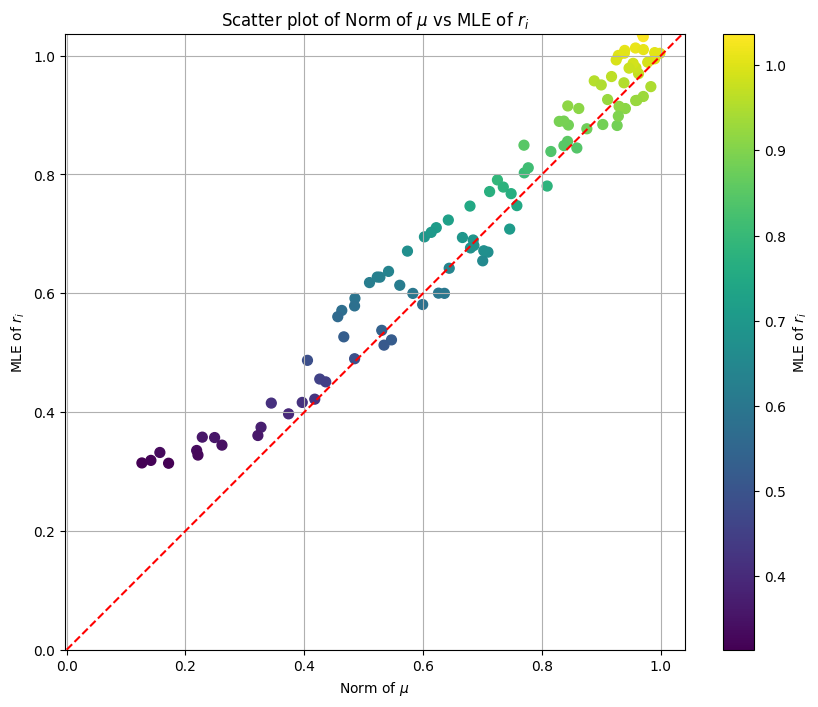

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def log_likelihood(r, tilde_x_samples, mu, Sigma, k):
    inv_Sigma = np.linalg.inv(Sigma)
    log_likelihood_value = 0
    for tilde_x in tilde_x_samples:
        log_likelihood_value += (k - 1) * np.log(r) - 0.5 * ((r * tilde_x - mu).T @ inv_Sigma @ (r * tilde_x - mu))
    return log_likelihood_value

def mle_r(tilde_x_samples, mu, Sigma, k, initial_guess=1.0):
    neg_log_likelihood = lambda r: -log_likelihood(r, tilde_x_samples, mu, Sigma, k)
    result = minimize(neg_log_likelihood, initial_guess, bounds=[(0, None)])  # r must be positive
    if result.success:
        return result.x[0]
    else:
        raise ValueError("Optimization failed")

def inner_mle_plot_func(mu_0):
    cov_0 = np.array([[0.1, 0.05], [0.05, 0.1]])
    n_samples = 1000
    samples = np.zeros((n_samples, 2))
    for i in range(n_samples):
        samples[i] = np.random.multivariate_normal(mu_0, cov_0)
    samples = samples / np.linalg.norm(samples, axis=1, keepdims=True)  # Normalize samples
    return mle_r(samples, mu_0, cov_0, k=2, initial_guess=0.1)

def generate_random_mu_in_unit_ball(num_points):
    mu_values = []
    while len(mu_values) < num_points:
        mu = np.random.uniform(-1, 1, 2)
        if np.linalg.norm(mu) <= 1:
            mu_values.append(mu)
    return np.array(mu_values)

def plot_mle_changes(num_points=100):
    mu_values = generate_random_mu_in_unit_ball(num_points)
    mle_values = []
    norms = []

    for mu in mu_values:
        try:
            mle_values.append(inner_mle_plot_func(mu))
            norms.append(np.linalg.norm(mu))
        except Exception:
            continue

    plt.figure(figsize=(10, 8))
    plt.scatter(norms, mle_values, c=mle_values, cmap='viridis', s=50)
    plt.colorbar(label='MLE of $r_i$')
    plt.xlabel(r'Norm of $\mu$')
    plt.ylabel(r'MLE of $r_i$')
    plt.title('Scatter plot of Norm of $\mu$ vs MLE of $r_i$')
    plt.grid(True)
    plt.axis('equal')  # Ensure the axis are equal
    plt.xlim(0, max(norms + mle_values))  # Center the plot
    plt.ylim(0, max(norms + mle_values))  # Center the plot
    plt.plot([0, max(norms + mle_values)], [0, max(norms + mle_values)], 'r--')  # Add y=x line
    plt.show()

# Example usage
plot_mle_changes()
